In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/kaggle/input/graduate-admissions-dataset/Admission_Predict.csv")

# EDA

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [5]:
print(f"Rows: {data.shape[0]}\nColumns: {data.shape[1]}")

Rows: 400
Columns: 9


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


<Axes: >

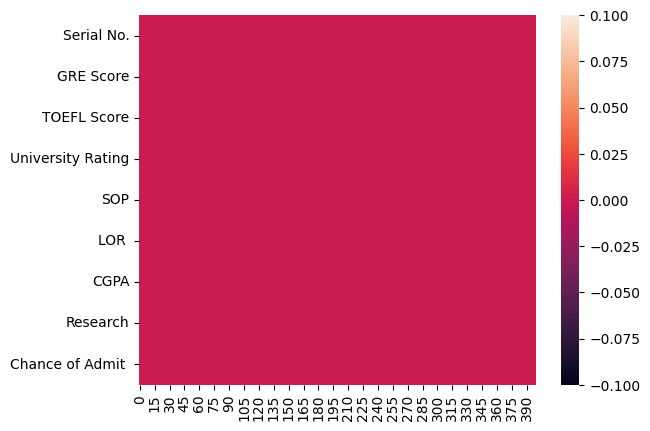

In [7]:
sns.heatmap(data.T.isnull())

In [8]:
data.describe(include="all")

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# Dropping Irrelevant Features

In [9]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [10]:
data.drop("Serial No.", axis=1, inplace=True)

In [11]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# Store Feature Matrix In X and Response(Target) In Vector y

In [12]:
X = data.drop("Chance of Admit ", axis=1)
y = data["Chance of Admit "]

# Splitting The Dataset Into The Training Set And Test Set


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Feature Scaling


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
st = StandardScaler()

In [17]:
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

# Import The models


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Model Training

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)

svr = SVR()
svr.fit(X_train, y_train)

gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

print("Done!")

Done!


# Prediction on Test Data

In [20]:
predict1 = lr.predict(X_test)
predict2 = svr.predict(X_test)
predict3 = gr.predict(X_test)
predict4 = rf.predict(X_test)


# Evaluating the Algorithm Classification


In [21]:
from sklearn.metrics import r2_score

In [22]:
s1 = r2_score(y_test, y_pred=predict1)
s2 = r2_score(y_test, y_pred=predict2)
s3 = r2_score(y_test, y_pred=predict3)
s4 = r2_score(y_test, y_pred=predict4)

# Final

In [23]:
final_data = pd.DataFrame(data={
    "Models": ["LR", "SVR", "RF", "GR"],
    "SCORE": [s1, s2, s4, s3]
})
final_data

,Models,SCORE
0,LR,0.821208
1,SVR,0.759781
2,RF,0.803006
3,GR,0.795155


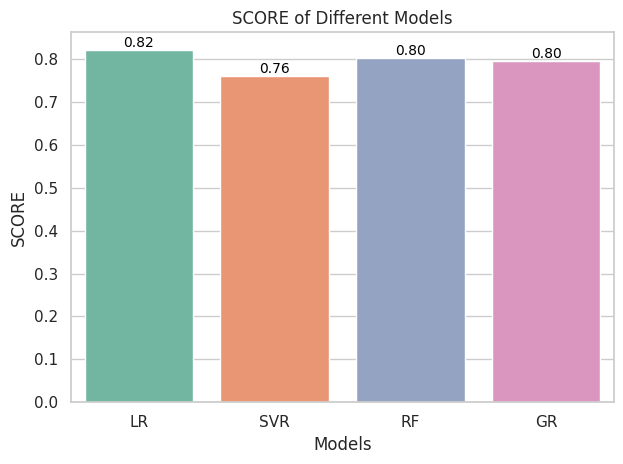

In [24]:
sns.set(style="whitegrid") 

ax = sns.barplot(data=final_data, x="Models", y="SCORE", palette="Set2") 

ax.set_title('SCORE of Different Models')  
ax.set_xlabel('Models')  
ax.set_ylabel('SCORE')  

for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout() 
plt.show()

# Classification

In [25]:
y_train = np.array([1 if value > 0.8 else 0 for value in y_train])

In [26]:
y_test = np.array([1 if value > 0.8 else 0 for value in y_test])

# Import The models


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Model Training & Evaluation


In [28]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_predict1 = lr.predict(X_test)

In [29]:
svc = SVC()
svc.fit(X_train, y_train)
y_predict2 = svc.predict(X_test)

In [30]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_predict3 = knn.predict(X_test)

In [31]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_predict4 = rf.predict(X_test)

In [32]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_predict5 = gb.predict(X_test)

# Final

In [33]:
final_data = pd.DataFrame(
    data={
        "Models": ["LR", "SVC", "KNN", "RF", "GB"],
        "ACC": [
            accuracy_score(y_true=y_test, y_pred=y_predict1),
            accuracy_score(y_true=y_test, y_pred=y_predict2),
            accuracy_score(y_true=y_test, y_pred=y_predict3),
            accuracy_score(y_true=y_test, y_pred=y_predict4),
            accuracy_score(y_true=y_test, y_pred=y_predict5)
        ]
    }
)
final_data

,Models,ACC
0,LR,0.9250
1,SVC,0.9250
2,KNN,0.8875
3,RF,0.9250
4,GB,0.9750


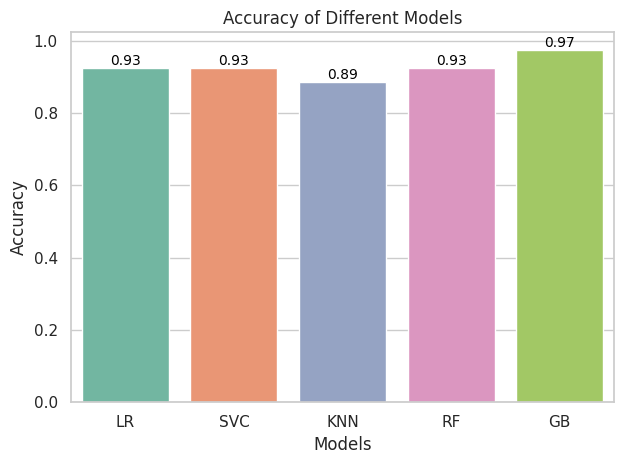

In [34]:
sns.set(style="whitegrid") 

ax = sns.barplot(data=final_data, x="Models", y="ACC", palette="Set2") 

ax.set_title('Accuracy of Different Models')  
ax.set_xlabel('Models')  
ax.set_ylabel('Accuracy')  

for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout() 
plt.show()

# Save The Model


In [35]:
X = data.drop("Chance of Admit ", axis=1)
y = np.array([1 if value > 0.8 else 0 for value in data["Chance of Admit "]])

In [36]:
X = st.fit_transform(X)

In [37]:
gr = GradientBoostingClassifier()
gr.fit(X, y)

GradientBoostingClassifier()

In [38]:
b = gr.predict(X)

In [39]:
accuracy_score(y, b)

0.995

In [40]:
import joblib

In [41]:
joblib.dump(gr, "model_admission")

['model_admission']

# for gui with flet ==> https://github.com/OmarBelfeki